<a href="https://colab.research.google.com/github/IsabelGayayan/Data-Mining/blob/main/Stroke_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Preprocessing is the process of transforming raw data into an understandable 
format. It is also an important step in data mining as we cannot work with raw data. The 
quality of the data should be checked before applying machine learning or data mining 
algorithms. 

Data preprocessing is important because it helps with 
1. Accuracy 
2. Completeness  
3. Consistency  
4. Timeliness 
5. Believability   
6. Interpretability  

Data Preprocessing Consists of: 
- Data cleaning  
- Data integration 
- Data reduction   
- Data Transformation and Data Discretization 
We will be using the Stroke Prediction Dataset  
https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset 
 
Context:  
According to the World Health Organization stroke is the 2nd leading e 2nd 
leading cause of death globally, responsible for approximately 11% of total 
deaths. 
This dataset is used to predict whether a patient is likely to get stroke based on 
the input parameters like gender, age, various diseases, and smoking status. 
Each row in the data provides relevant information about the patient. 


In [2]:
#import data and libraries
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt 
%matplotlib inline 
import seaborn as sns 
my_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/healthcare-dataset-stroke-data.csv')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#1.  Generate the descriptive statistics (what are the observations)
my_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


From the dataset, the mean age of patients with heart disease is on average 43 years old and the mean glucose level for those patients is 106. Also, the data shows that most patients did not have a stroke according to the percentiles within the 25% to 75% of patients have no strokes. 

In [5]:
#check imported data
my_data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

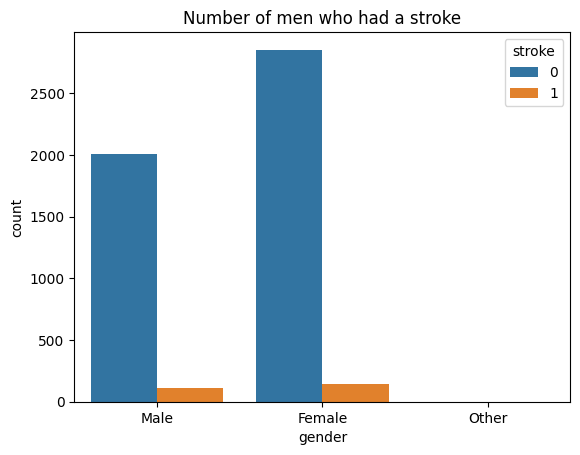

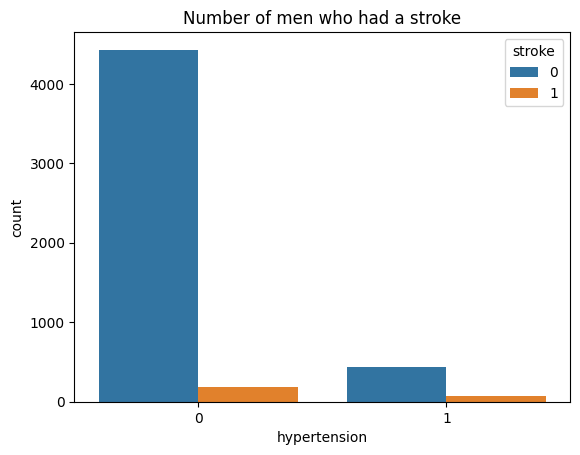

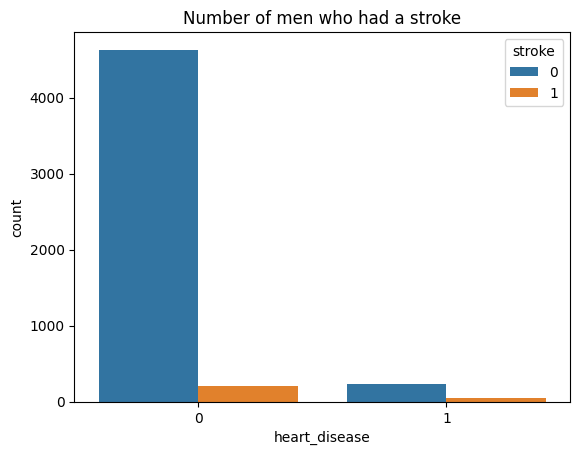

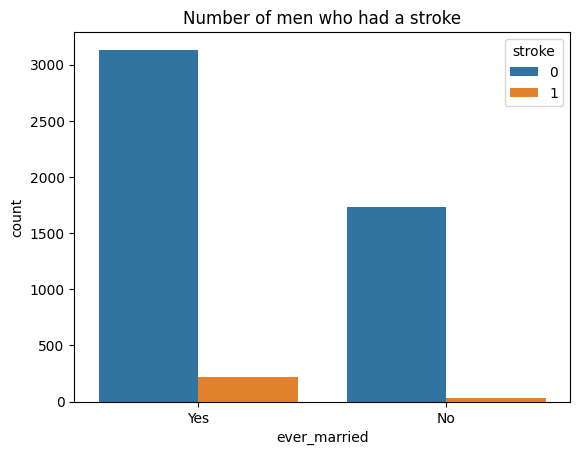

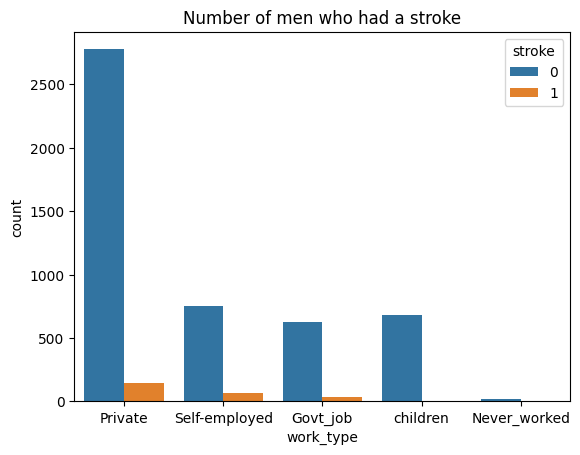

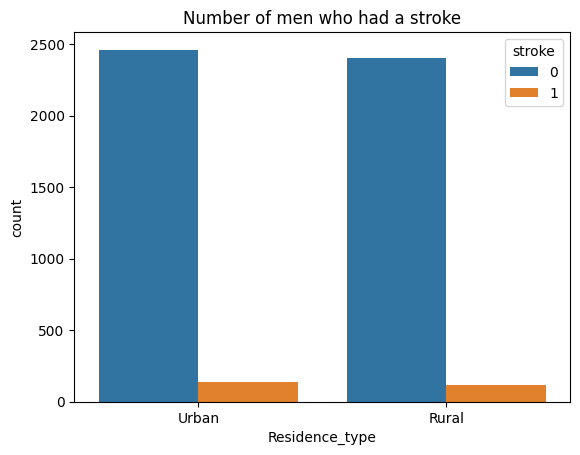

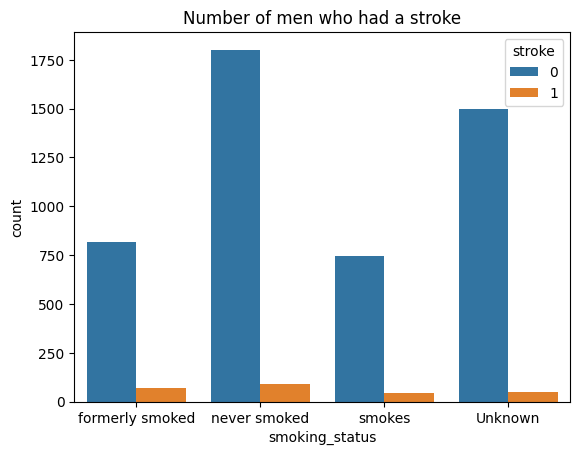

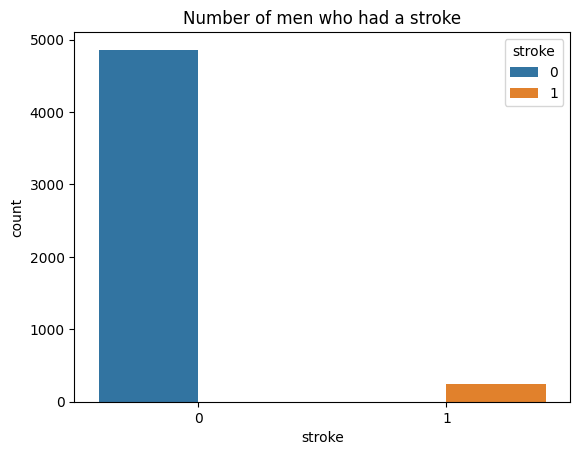

In [6]:
#2. Stroke frequency on different parameters. This is a barplot (E.g # of Males who had a stroke) ( You do not need to do this for BMI or age ) 
for i in my_data.columns[1:]:
    if (my_data[i].dtype == 'object') or (my_data[i].dtype == 'int64'):
        sns.countplot(data = my_data, x = i, hue = 'stroke')
        plt.title('Number of men who had a stroke'.format(i))
        plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


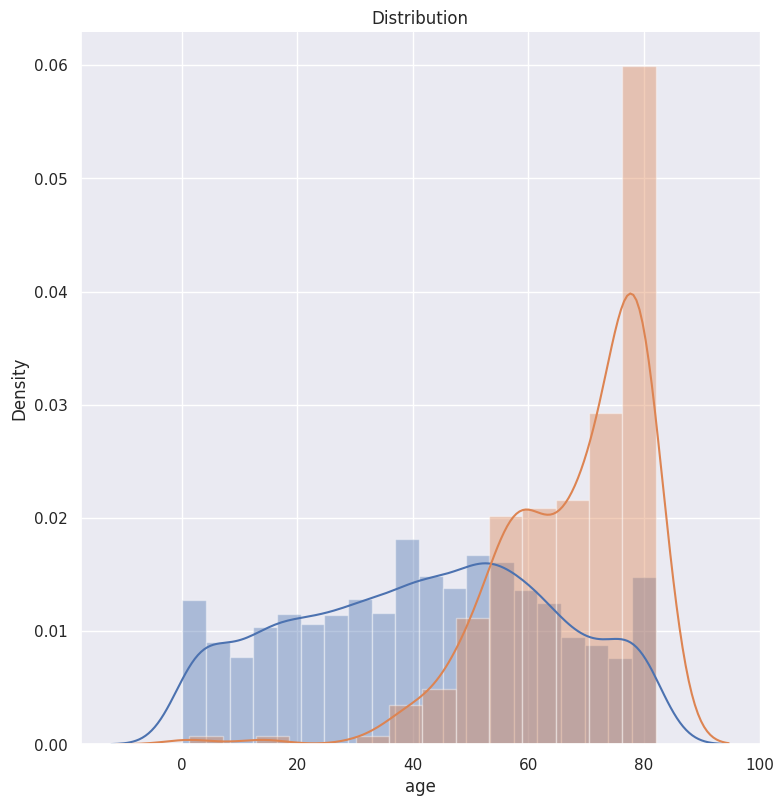

In [7]:
#3. Create a Distribution plot to understand how age impacts having a stroke. Describe your results.  
sns.set(rc={'figure.figsize': (18,10)})
sns.FacetGrid(my_data, hue = "stroke", height = 8).map(sns.distplot, "age")
plt.title("Distribution")
plt.show()

Text(0, 0.5, 'Age')

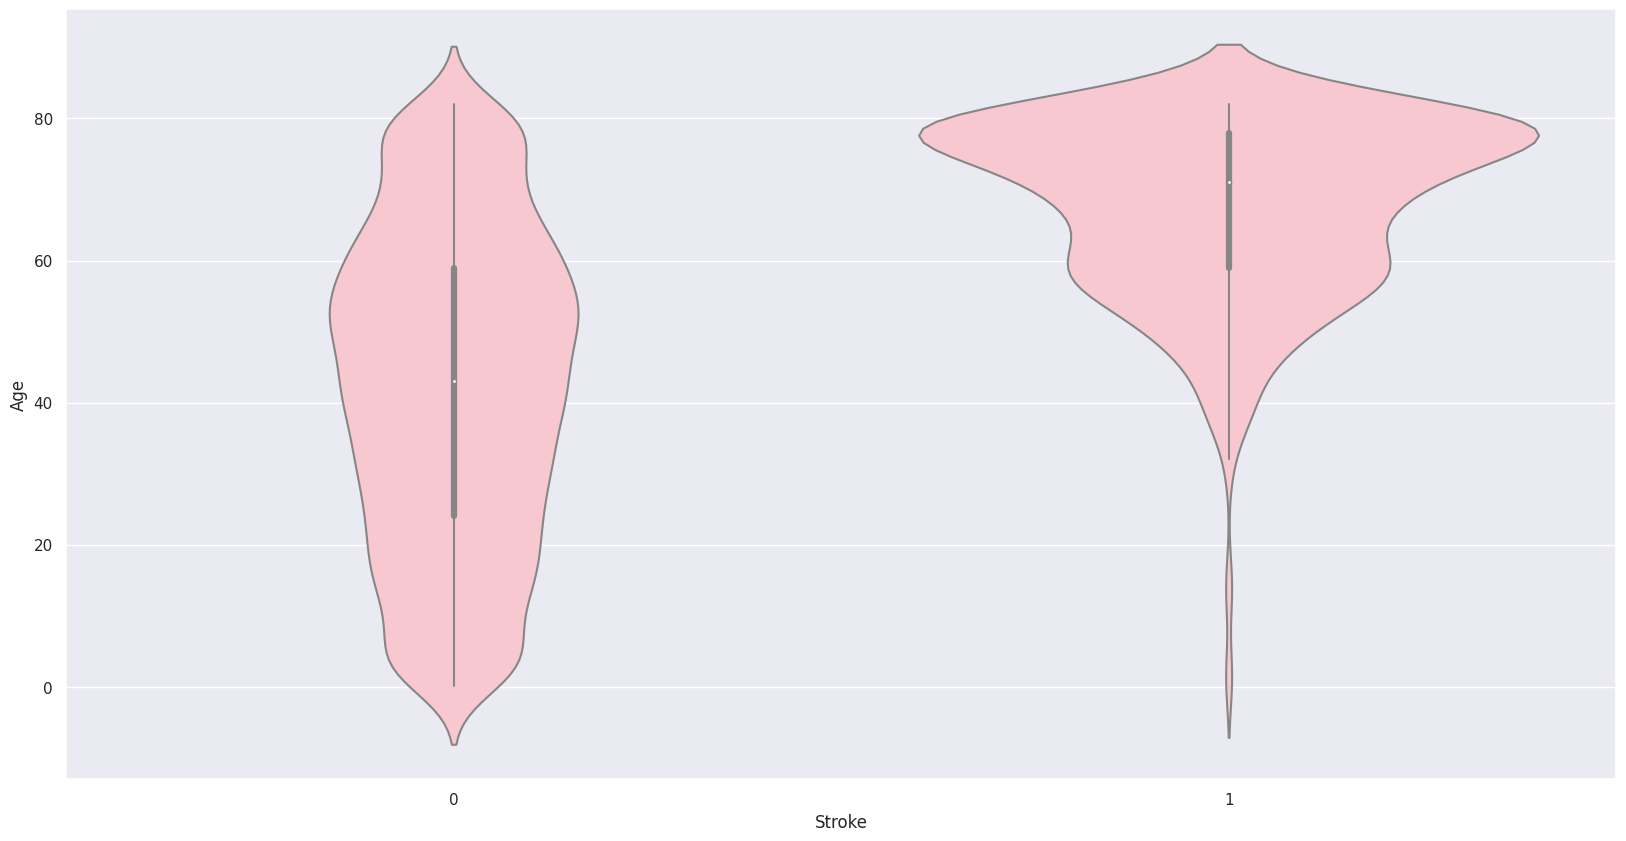

In [8]:
#4. Create a violin plot to understand the patients likelihood of getting a stroke. 
sns.set(rc = {'figure.figsize': (20,10)})
seaborn_plot = sns.violinplot(x = "stroke", y = "age", color = 'pink', data = my_data)

seaborn_plot.set_xlabel("Stroke")
seaborn_plot.set_ylabel("Age")

This data set seems to be imbalanced because the distibution of obseravtions on the right are uneven.

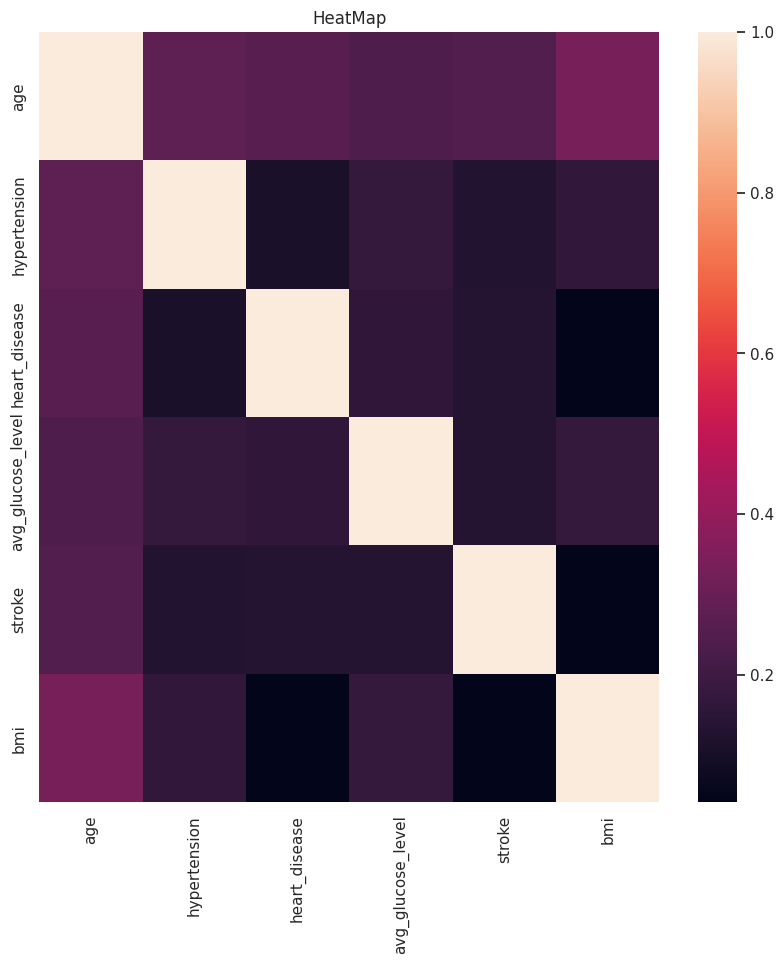

In [9]:
#6.Generate a heat map to understand the correlation among the variables. Describe your results.  (Which variables have the strongest correlation)  
fig,ax = plt.subplots(figsize = (10,10))

hm = sns.heatmap(my_data[['age', 'hypertension', 'heart_disease','avg_glucose_level', 'stroke','bmi']].corr(), vmax=1)
hm.set_title("HeatMap")
plt.show()

In [10]:
my_data[1:].corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003806,0.003467,-0.000233,0.001782,0.003352,0.007527
age,0.003806,1.000000,0.276498,0.263415,0.237810,0.333256,0.244843
hypertension,0.003467,0.276498,1.000000,0.108763,0.174775,0.167892,0.128435
heart_disease,-0.000233,0.263415,0.108763,1.000000,0.160030,0.040565,0.131772
avg_glucose_level,0.001782,0.237810,0.174775,0.160030,1.000000,0.175102,0.129946
bmi,0.003352,0.333256,0.167892,0.040565,0.175102,1.000000,0.041525
stroke,0.007527,0.244843,0.128435,0.131772,0.129946,0.041525,1.000000


Result Description: From the correlation heat map above it shows a significant correlation between all listed attributes age, hypertension, heart disease, average glucose level, and stroke. 

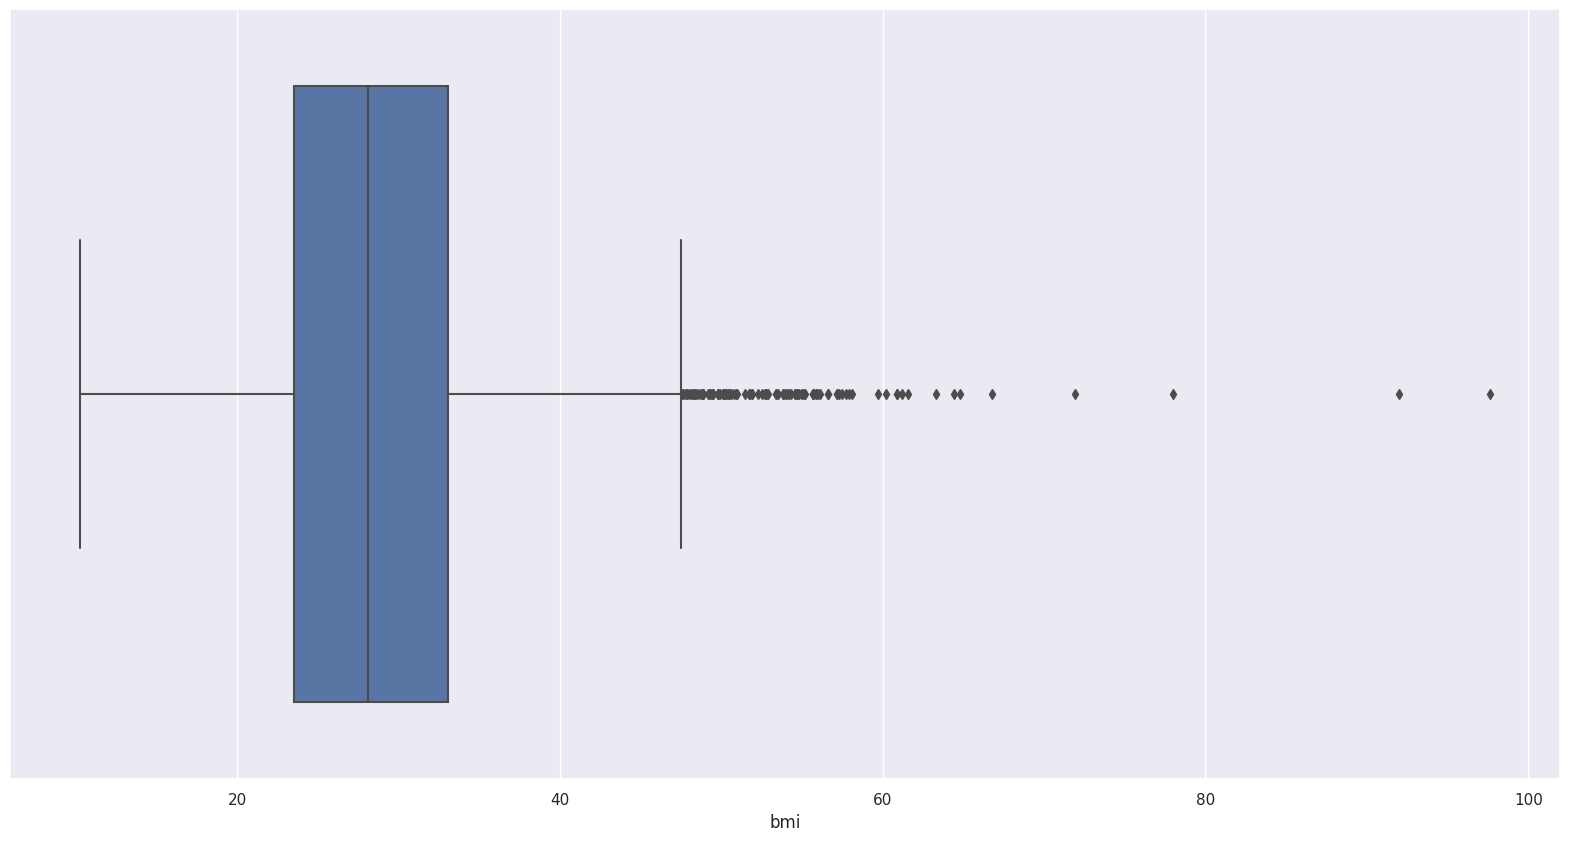

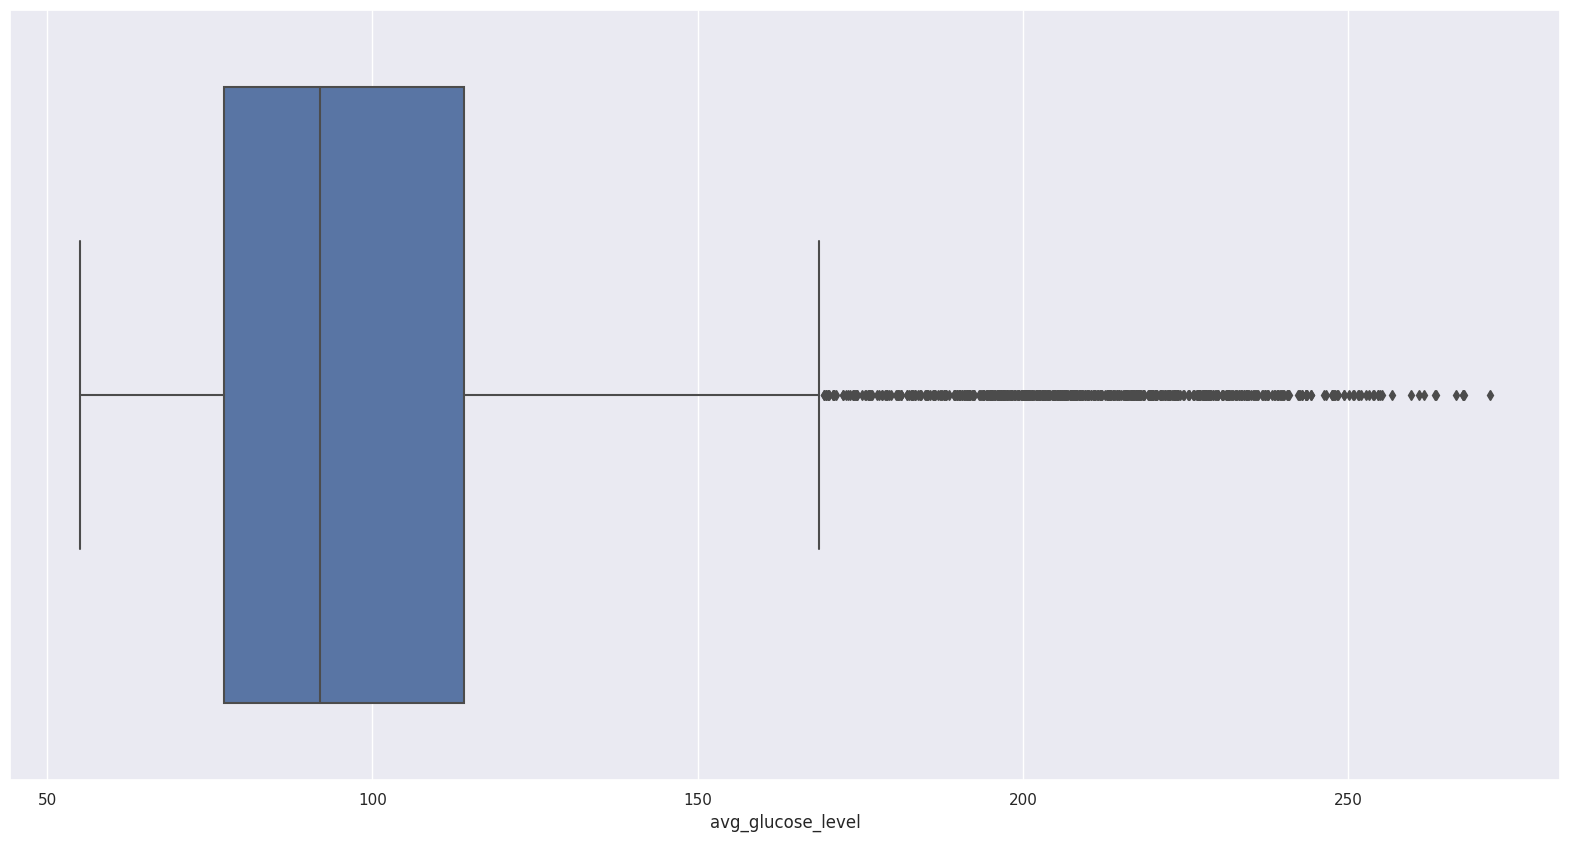

In [11]:
#7.Check for outliers in the BMI column and Average_Glucose Column and remove them. 
plt.figure(figsize = (20,10))
sns.boxplot(data = my_data, x = my_data["bmi"]);
plt.figure(figsize=(20,10))
sns.boxplot(data = my_data, x = my_data["avg_glucose_level"]);

In [12]:
#8. Handle the null values for BMI . ( DO NOT DROP the null values. ) (Use one of the imputation methods we talked about in class)
my_data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [13]:
#remove outliers 201 bmi 
bmi_outliers = my_data.loc[my_data["bmi"] >45]
avg_glucose_level = my_data.loc[my_data["avg_glucose_level"] > 170]

filter = (my_data['bmi'] >45) & (my_data['avg_glucose_level'] > 170)

In [14]:
#imputation method
from sklearn.impute import SimpleImputer
impute_mean = SimpleImputer(missing_values=np.nan, strategy = 'mean')
data_imputed = impute_mean.fit_transform(my_data[['bmi']])
my_data['bmi'] = data_imputed
my_data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [15]:
#9. Transform the variables that are an object datatype. (Use the Label Encoder library) 
from sklearn.preprocessing import LabelEncoder
label_encod = LabelEncoder()
for column in my_data.select_dtypes(include=['object']):
  my_data[column]=label_encod.fit_transform(my_data[column])

my_data.dtypes

id                     int64
gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

PROJECT #2 - Continuation of Project 1

In [16]:
#new imports
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score

In [17]:
#1. Split the dataset into training and testing sets. This dataset is imbalanced, solve this problem by using SMOTE. 

#define x and y 
x,y = SMOTE().fit_resample(my_data[['age','gender','hypertension','bmi','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','smoking_status']],my_data['stroke'])
smote = SMOTE(sampling_strategy = 0.5, k_neighbors = 5, random_state = 100) 

#split data 
smote = SMOTE(random_state = 2)
x_training, y_training = smote.fit_resample(x,y)

#print statements
print('Result after SMOTE x_training{}'.format(x_training.shape))
print('Result after SMOTE y_training{}'.format(y_training.shape))
print("Result after SMOTE, counts of label '1': {}".format(sum(y_training == 1))) 
print("Result after SMOTE, counts of label '0': {}".format(sum(y_training == 0)))

Result after SMOTE x_training(9722, 10)
Result after SMOTE y_training(9722,)
Result after SMOTE, counts of label '1': 4861
Result after SMOTE, counts of label '0': 4861


In [18]:
#2.Model Building
#standardize your data
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scale = StandardScaler()
scaled_data = scale.fit_transform(my_data)
print(scaled_data)

[[-1.29831203e+00  1.18807255e+00  1.05143428e+00 ...  1.00123401e+00
  -3.51780710e-01  4.41838074e+00]
 [ 7.16371490e-01 -8.40343999e-01  7.86070073e-01 ...  4.61555355e-16
   5.81552327e-01  4.41838074e+00]
 [-2.55478192e-01  1.18807255e+00  1.62639008e+00 ...  4.68577254e-01
   5.81552327e-01  4.41838074e+00]
 ...
 [-7.93719586e-01 -8.40343999e-01 -3.63841511e-01 ...  2.21736316e-01
   5.81552327e-01 -2.26327259e-01]
 [ 4.84965773e-02  1.18807255e+00  3.43796387e-01 ... -4.27845098e-01
  -3.51780710e-01 -2.26327259e-01]
 [ 3.85694957e-01 -8.40343999e-01  3.42048064e-02 ... -3.49895329e-01
  -1.28511375e+00 -2.26327259e-01]]


In [19]:
#Build a Logistic Regression model using the training set.
log_reg = LogisticRegression(max_iter = 1000)
log_reg.fit(x_training, y_training)

log_reg_predict = log_reg.predict(x_training)
print(classification_report(y_training, log_reg_predict))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      4861
           1       0.79      0.82      0.81      4861

    accuracy                           0.80      9722
   macro avg       0.80      0.80      0.80      9722
weighted avg       0.80      0.80      0.80      9722



In [20]:
#Build a Naive Bayes model using the training set.
bayes_model = GaussianNB()
bayes_model.fit(x_training,y_training)

#measure score for accuracy 
bayes_model.score(x_training,y_training)

bayes_predict = bayes_model.predict(x_training)
print(classification_report(y_training, bayes_predict))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77      4861
           1       0.75      0.85      0.80      4861

    accuracy                           0.78      9722
   macro avg       0.79      0.78      0.78      9722
weighted avg       0.79      0.78      0.78      9722



In [21]:
#Build a K Nearest Neighbor Classifier model using the training set.
knn_model = KNeighborsClassifier()
knn_model.fit(x_training,y_training)

#measure score for accuracy 
knn_model.score(x_training,y_training)

knn_predict = knn_model.predict(x_training)
print(classification_report(y_training, knn_predict))

              precision    recall  f1-score   support

           0       0.99      0.85      0.91      4861
           1       0.87      0.99      0.93      4861

    accuracy                           0.92      9722
   macro avg       0.93      0.92      0.92      9722
weighted avg       0.93      0.92      0.92      9722



In [22]:
#Build a  Support Vector Machine Classifier model using the training set.
svmc_model = SVC()
svmc_model.fit(x_training,y_training)

#measure score for accuracy 
svmc_model.score(x_training,y_training)

svmc_predict = svmc_model.predict(x_training)
print(classification_report(y_training, svmc_predict))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76      4861
           1       0.74      0.84      0.79      4861

    accuracy                           0.77      9722
   macro avg       0.78      0.77      0.77      9722
weighted avg       0.78      0.77      0.77      9722



In [23]:
#3: Model Evaluation
#Evaluate the performance of both models on the testing set using accuracy, f-score, and the AUC-ROC curve.
#Interpret the results of the evaluation and compare the performance of the four different models.

#3.5 : AUC-ROC Curve. 
The evaluation of multiple models against each other is a critical stage. AUC - ROC curve is a 
performance measurement for the classification problems at various threshold settings. ROC is a 
probability curve and AUC represents the degree or measure of separability. It tells how much 
the model is capable of distinguishing between classes. Higher the AUC, the better the model is 
at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the 
model is at distinguishing between patients with the disease and no disease.  Compute the 
Receiver operating characteristic for the models. Determine which model is curve is higher.  This 
can help us determine which model 
did a better job in classification as 
well. 


In [24]:
#calculate AUROC scores
logreg_auc = roc_auc_score(y_training,log_reg_predict)
bayes_auc = roc_auc_score(y_training, bayes_predict)
knn_auc = roc_auc_score(y_training, knn_predict)
svmc_auc = roc_auc_score(y_training, svmc_predict)

#print scores 
print('Logistic Regression: AUROC = %.3f' % (logreg_auc))
print('Naive Bayes: AUROC = %.3f' % (bayes_auc))
print('K-Nearest Neighbor: AUROC = %.3f' % (knn_auc))
print('Selection Vector Machine Classifier: AUROC = %.3f' % (svmc_auc))

Logistic Regression: AUROC = 0.804
Naive Bayes: AUROC = 0.783
K-Nearest Neighbor: AUROC = 0.921
Selection Vector Machine Classifier: AUROC = 0.772


In [25]:
#calculate ROC curve
lg_fpr, lg_tpr, _ = roc_curve(y_training, log_reg_predict)
b_fpr, b_tpr, _ = roc_curve(y_training, bayes_predict)
knn_fpr, knn_tpr, _ = roc_curve(y_training, knn_predict)
svmc_fpr, svmc_tpr, _ = roc_curve(y_training, svmc_predict)

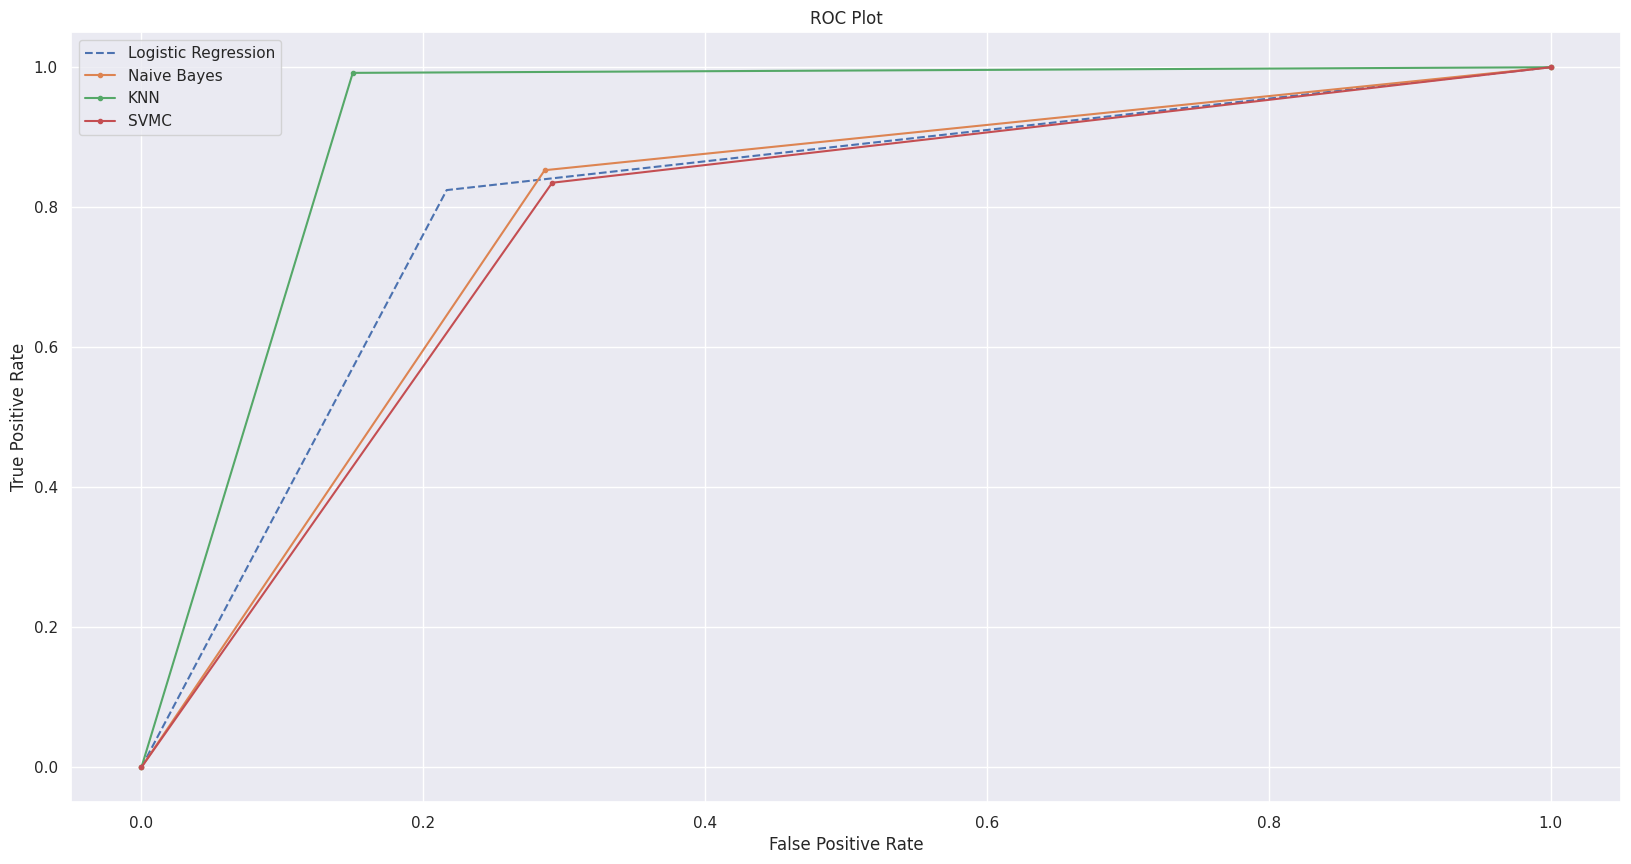

In [26]:
#plot curve
plt.plot(lg_fpr, lg_tpr, linestyle='--', label='Logistic Regression' % logreg_auc)
plt.plot(b_fpr, b_tpr, marker='.', label='Naive Bayes' % bayes_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN' % knn_auc)
plt.plot(svmc_fpr, svmc_tpr, marker='.', label='SVMC' % svmc_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend(loc = 'best') 
plt.savefig('ROC', dpi = 300)
# Show plot
plt.show();

Comparing the results of the different models in the graph above suggests that the best model for accuracy is KNN.


# **References** 

1:
    
    Title: How to Perform Logistic Regression in Python(Step by Step)
    Author: Datarmat
    Date: September 26, 2019
    Availability: https://www.datarmatics.com/data-science/how-to-perform-logistic-regression-in-pythonstep-by-step/

2:  
    
    Title: Naive Bayes Tutorial Part 1
    Author: dhavalsays
    Date: November 17, 2019
    Availability: https://github.com/codebasics/py/blob/master/ML/14_naive_bayes/14_naive_bayes_1_titanic_survival_prediction.ipynb

3:

    Title: Machine Learning in Python: Making Receiver Operating Characteristic (ROC) curve
    Author: dataprofessor
    Date: April 3, 2020
    Availability: https://github.com/dataprofessor/code/blob/master/python/ROC_curve.ipynb
